In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn import metrics 
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree 
import warnings
import pathlib
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
DATA=pathlib.Path.cwd()

In [3]:
df=pd.read_csv(DATA/'datasets'/'cars_evaluation_data'/'data.csv')

In [4]:
df.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [5]:
df.shape

(1727, 7)

Setting the columns names:
`['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']`

In [6]:
df.columns=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

Exploring dataset and displaying the number of occurrences of each value of each of the independent variables.

In [7]:
[df[i].value_counts() for i in df.columns]

[high     432
 med      432
 low      432
 vhigh    431
 Name: buying, dtype: int64,
 high     432
 med      432
 low      432
 vhigh    431
 Name: maint, dtype: int64,
 3        432
 4        432
 5more    432
 2        431
 Name: doors, dtype: int64,
 4       576
 more    576
 2       575
 Name: persons, dtype: int64,
 med      576
 big      576
 small    575
 Name: lug_boot, dtype: int64,
 med     576
 high    576
 low     575
 Name: safety, dtype: int64,
 unacc    1209
 acc       384
 good       69
 vgood      65
 Name: class, dtype: int64]

Analyzing target value: how many cars of each class do we  have in dataset.

In [8]:
df['class'].value_counts()

unacc    1209
acc       384
good       69
vgood      65
Name: class, dtype: int64

The 'class' is the ordinal value, because the value can be ranked according to the growth of the assessment of the condition of the car (from unacceptable to very good). Dataset is unbalanced because there are one major class - 'unacc'(unacceptable) and three minor classes in dataset.

Exploring missing values in dataset

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1727 non-null   object
 1   maint     1727 non-null   object
 2   doors     1727 non-null   object
 3   persons   1727 non-null   object
 4   lug_boot  1727 non-null   object
 5   safety    1727 non-null   object
 6   class     1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [10]:
X=df[['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety']]
y=df['class']

Dividing dataset into train and test datasets.

In [11]:
test_size=0.33
X_train_df, X_test_df, y_train, y_test = train_test_split(X, y, test_size=test_size, shuffle=True, random_state=42)

In [12]:
X_train_df[:5]

,buying,maint,doors,persons,lug_boot,safety
83,vhigh,vhigh,5more,2,med,low
48,vhigh,vhigh,3,more,med,med
468,high,vhigh,3,4,small,med
155,vhigh,high,3,more,med,low
1043,med,high,4,more,small,low


In [13]:
X_test_df[:5]

,buying,maint,doors,persons,lug_boot,safety
599,high,high,4,2,big,low
932,med,vhigh,4,4,big,low
628,high,high,5more,2,big,high
1497,low,high,5more,4,med,med
1262,med,low,4,more,med,low


In [14]:
X_train_df.shape, X_test_df.shape

((1157, 6), (570, 6))

Checking type of data in training set.

In [15]:
X_train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1157 entries, 83 to 1126
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1157 non-null   object
 1   maint     1157 non-null   object
 2   doors     1157 non-null   object
 3   persons   1157 non-null   object
 4   lug_boot  1157 non-null   object
 5   safety    1157 non-null   object
dtypes: object(6)
memory usage: 63.3+ KB


Coding categorical variables.

In [16]:
buying = ['low','med','high','vhigh']
maint = ['low','med','high','vhigh']
doors = ['2','3','4', '5more']
persons = ['2','4', 'more']
lug_boot = ['small', 'med', 'big']
safety = ['low', 'med', 'high']

enc = OrdinalEncoder(categories=[buying, maint,doors,persons,lug_boot,safety])

X_train = enc.fit_transform(X_train_df)
X_test = enc.transform(X_test_df)

Train and test sets after encoding.

In [17]:
X_train[:5]

array([[3., 3., 3., 0., 1., 0.],
       [3., 3., 1., 2., 1., 1.],
       [2., 3., 1., 1., 0., 1.],
       [3., 2., 1., 2., 1., 0.],
       [1., 2., 2., 2., 0., 0.]])

In [18]:
X_test[:5]

array([[2., 2., 2., 0., 2., 0.],
       [1., 3., 2., 1., 2., 0.],
       [2., 2., 3., 0., 2., 2.],
       [0., 2., 3., 1., 1., 1.],
       [1., 0., 2., 2., 1., 0.]])

Displaying the categories of encoder.

In [19]:
enc.categories_

[array(['low', 'med', 'high', 'vhigh'], dtype=object),
 array(['low', 'med', 'high', 'vhigh'], dtype=object),
 array(['2', '3', '4', '5more'], dtype=object),
 array(['2', '4', 'more'], dtype=object),
 array(['small', 'med', 'big'], dtype=object),
 array(['low', 'med', 'high'], dtype=object)]

Training of Logistic Regression model.

In [20]:
clf = LogisticRegression(random_state=42)
clf.fit(X_train, y_train)

LogisticRegression(random_state=42)

Making predictions for target values.

In [21]:
y_train_pred=clf.predict(X_train)

In [22]:
y_test_pred=clf.predict(X_test)

Displaying metrics of model with classification_report.

In [23]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

         acc       0.66      0.60      0.63       127
        good       0.56      0.28      0.37        18
       unacc       0.88      0.93      0.90       399
       vgood       0.80      0.77      0.78        26

    accuracy                           0.83       570
   macro avg       0.72      0.64      0.67       570
weighted avg       0.82      0.83      0.82       570



In [24]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

         acc       0.67      0.58      0.62       257
        good       0.56      0.43      0.49        51
       unacc       0.88      0.93      0.90       810
       vgood       0.79      0.67      0.72        39

    accuracy                           0.82      1157
   macro avg       0.72      0.65      0.68      1157
weighted avg       0.81      0.82      0.82      1157



Metric f1 seems to be usable for model evaluation and for comparing different models  because it reflects the balance of accuracy and completeness of detection of cars in the unacceptable category and is quite high for this model.

Training of Decision Tree model.

In [25]:
dtc = DecisionTreeClassifier(max_depth=4, random_state=42)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [26]:
y_train_pred=dtc.predict(X_train)

In [27]:
y_test_pred=dtc.predict(X_test)

Calculating metrics of Decision Tree model to compare it with Logistic Regression model.

In [28]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

         acc       0.75      0.72      0.74       127
        good       0.31      1.00      0.47        18
       unacc       0.96      0.94      0.95       399
       vgood       0.00      0.00      0.00        26

    accuracy                           0.85       570
   macro avg       0.51      0.67      0.54       570
weighted avg       0.85      0.85      0.84       570



Comparing two models, it looks like Decision Tree model is better in detecting unacceptable cars and has best accuracy score, than Logistic Regression model, but has a low precision in detecting of good cars and doesn't detect very good cars at all.

Displaying the parameters of Decision Tree model.

In [29]:
dtc.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 4,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

Visualizing Decision Tree.

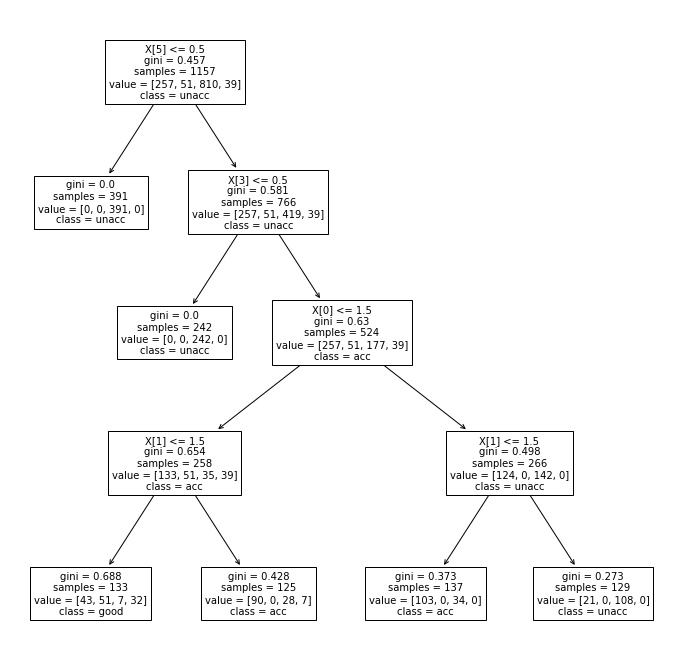

In [30]:
plt.figure(figsize=(12,12))
tree.plot_tree(dtc, class_names=dtc.classes_, fontsize=10)
plt.show()

Tuning hyperparameters of Decision Tree model with GridSearchCV.

In [31]:
parameters={'criterion':['gini', 'entropy'], 
            'max_depth':np.arange(1,10),
            'min_weight_fraction_leaf':np.arange(0,0.5,0.1)
           }

In [32]:
search=GridSearchCV(dtc,
                      parameters,
                      cv = 5, 
                      scoring="accuracy",
                      verbose=3)

In [33]:
search.fit(X_train, y_train)

Fitting 5 folds for each of 90 candidates, totalling 450 fits
[CV 1/5] END criterion=gini, max_depth=1, min_weight_fraction_leaf=0.0;, score=0.698 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=1, min_weight_fraction_leaf=0.0;, score=0.698 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=1, min_weight_fraction_leaf=0.0;, score=0.701 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=1, min_weight_fraction_leaf=0.0;, score=0.701 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=1, min_weight_fraction_leaf=0.0;, score=0.701 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=1, min_weight_fraction_leaf=0.1;, score=0.698 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=1, min_weight_fraction_leaf=0.1;, score=0.698 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=1, min_weight_fraction_leaf=0.1;, score=0.701 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=1, min_weight_fraction_leaf=0.1;, score=0.701 total time=   0.0s
[C

[CV 4/5] END criterion=gini, max_depth=6, min_weight_fraction_leaf=0.4;, score=0.701 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=6, min_weight_fraction_leaf=0.4;, score=0.701 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=7, min_weight_fraction_leaf=0.0;, score=0.931 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=7, min_weight_fraction_leaf=0.0;, score=0.909 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=7, min_weight_fraction_leaf=0.0;, score=0.913 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=7, min_weight_fraction_leaf=0.0;, score=0.922 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=7, min_weight_fraction_leaf=0.0;, score=0.944 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=7, min_weight_fraction_leaf=0.1;, score=0.884 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=7, min_weight_fraction_leaf=0.1;, score=0.879 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=7, min_weight_fraction_le

[CV 5/5] END criterion=entropy, max_depth=4, min_weight_fraction_leaf=0.0;, score=0.840 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=4, min_weight_fraction_leaf=0.1;, score=0.884 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=4, min_weight_fraction_leaf=0.1;, score=0.879 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=4, min_weight_fraction_leaf=0.1;, score=0.831 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=4, min_weight_fraction_leaf=0.1;, score=0.823 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=4, min_weight_fraction_leaf=0.1;, score=0.840 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=4, min_weight_fraction_leaf=0.2;, score=0.780 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=4, min_weight_fraction_leaf=0.2;, score=0.776 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=4, min_weight_fraction_leaf=0.2;, score=0.792 total time=   0.0s
[CV 4/5] END criterion=entropy, max_d

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(max_depth=4, random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'min_weight_fraction_leaf': array([0. , 0.1, 0.2, 0.3, 0.4])},
             scoring='accuracy', verbose=3)

In [34]:
search.best_params_

{'criterion': 'entropy', 'max_depth': 9, 'min_weight_fraction_leaf': 0.0}

In [35]:
best_model=search.best_estimator_

In [36]:
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

Displaying classification report for final model after tuning hyperparameters.

In [37]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

         acc       0.97      0.98      0.97       257
        good       1.00      0.94      0.97        51
       unacc       0.99      0.99      0.99       810
       vgood       0.97      0.97      0.97        39

    accuracy                           0.99      1157
   macro avg       0.98      0.97      0.98      1157
weighted avg       0.99      0.99      0.99      1157



In [38]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

         acc       0.93      0.94      0.93       127
        good       0.78      0.78      0.78        18
       unacc       0.99      0.99      0.99       399
       vgood       0.80      0.77      0.78        26

    accuracy                           0.96       570
   macro avg       0.87      0.87      0.87       570
weighted avg       0.96      0.96      0.96       570



As can be seen from the report model with tuned hyperparameters has better metrics. This model has high accuracy on both train and test set.

Creating confusion matrix for model with the best parameters.

In [39]:
cm=confusion_matrix(y_test, y_test_pred, labels=best_model.classes_)

In [40]:
cm_disp=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)

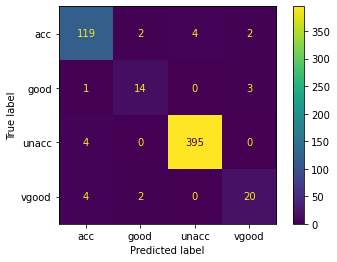

In [41]:
cm_disp.plot();

As can be seen from the matrix the model most confuses unacceptable with acceptable cars, and very good with acceptable cars